Взять датасет из google диска: https://drive.google.com/file/d/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [41]:
!wget 'https://drive.google.com/uc?export=download&id=1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_' -O data.zip

--2022-04-17 13:15:02--  https://drive.google.com/uc?export=download&id=1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_
Resolving drive.google.com (drive.google.com)... 108.177.11.100, 108.177.11.101, 108.177.11.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ra2t0kc8tbn0qe99tvl6n0450ajb78lf/1650201300000/14904333240138417226/*/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_?e=download [following]
--2022-04-17 13:15:03--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ra2t0kc8tbn0qe99tvl6n0450ajb78lf/1650201300000/14904333240138417226/*/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_?e=download
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-04-c0-docs.googleusercontent.com (doc-04-c0-doc

In [42]:
!unzip data.zip

Archive:  data.zip
replace marketing description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace marketing_campaign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace subscribers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace users.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [69]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro

In [70]:
data = pd.read_csv('marketing_campaign.csv')
data

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True
10033,a11033,1/17/18,Email,control,German,True
10034,a11034,1/5/18,Instagram,control,German,False
10035,a11035,1/17/18,Email,control,German,True


In [71]:
data.variant.value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

In [72]:
data.variant.replace(['control','personalization'],[0, 1],inplace=True) 


In [73]:
data.variant.value_counts()

0    5091
1    4946
Name: variant, dtype: int64

In [74]:
data.converted.value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [75]:
data.converted.replace(['False','True'],[0, 1],inplace=True) 
# level_map = {1:'True', 0:'False'}
# data['converted'] = data['converted'].map(level_map)

In [76]:
data.converted.value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [77]:
grouped = data.pivot_table(values='variant', index='converted', aggfunc=['sum', 'count'])
grouped

,sum,count
,variant,variant
converted,,
False,4241,8946
True,705,1076


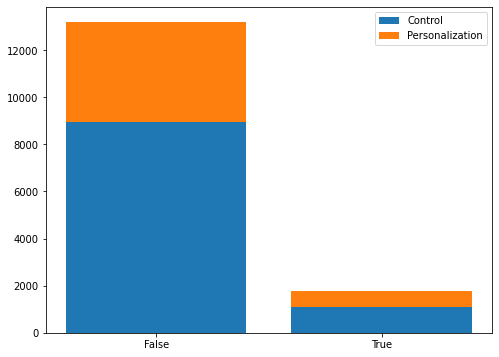

In [79]:
plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['variant'], label='Control')
plt.bar([1, 2], grouped['sum']['variant'], bottom=grouped['count']['variant'], label='Personalization')
plt.xticks([1, 2], ['False', 'True'])
plt.legend();

In [55]:
shapiro(data['variant'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.6364800930023193, 0.0)

No handles with labels found to put in legend.


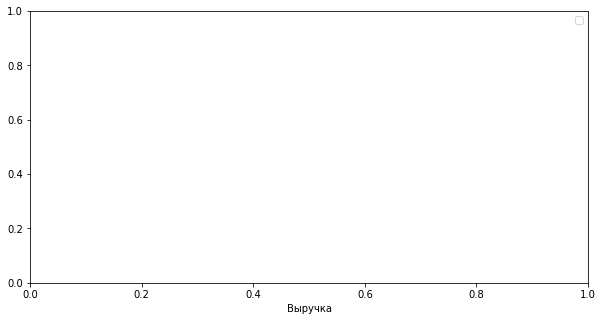

In [57]:
data_revenue = data[['variant', 'converted']]
data_revenue_A = data_revenue[data_revenue['converted'] == 'False']['variant']
data_revenue_B = data_revenue[data_revenue['converted'] == 'True']['variant']

plt.figure(figsize=(10, 5))

sns.kdeplot(data_revenue_A, shade=True, label='Группа False', color='g')
sns.kdeplot(data_revenue_B, shade=True, label='Группа True', color='r')

plt.xlabel('Выручка')
plt.legend()
plt.show()

In [63]:
data.groupby('converted')['variant'].describe()

,count,mean,std,min,25%,50%,75%,max
converted,,,,,,,,
False,8946.0,0.474067,0.499355,0.0,0.0,0.0,1.0,1.0
True,1076.0,0.655204,0.475523,0.0,0.0,1.0,1.0,1.0


In [64]:
from scipy.stats import mannwhitneyu

mw_stats = mannwhitneyu(x=data[data['converted'] == 'False']['variant'].values,
                        y=data[data['converted'] == 'True']['variant'].values)

mw_stats

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


MannwhitneyuResult(statistic=0.0, pvalue=0.0)